# Chapter 5

## Likelihood Ratio Test of GLM and Its Asymmetry

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sfm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Hyperparameters
significant_level = 0.05
max_iter = 1000

In [3]:
data = pd.read_csv('../input/data3a.csv')
data['d'] = pd.get_dummies(data['f'])['T']

In [4]:
fit1 = sfm.glm(formula='y ~ 1', data=data, family=sm.families.Poisson()).fit()
fit2 = sfm.glm(formula='y ~ x', data=data, family=sm.families.Poisson()).fit()

In [5]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Thu, 30 May 2019   Deviance:                       89.507
Time:                        12:33:23   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128
==============================================================================
"""

In [6]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 30 May 2019   Deviance:                       84.993
Time:                        12:33:24   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [7]:
base_delta_d = fit1.deviance - fit2.deviance
base_delta_d

4.513941078851801

## Method 1: Parametric Bootstrap method

In [8]:
# Predicted mean number of seeds by Null hypothesis
nullmodel_pred_lambda = np.exp(fit1.params[0])

In [9]:
delta_d = []
for i in range(1000):
    data['y_rand'] = np.random.poisson(nullmodel_pred_lambda, size=len(data))
    fit1 = sfm.glm(formula='y_rand ~ 1', data=data, family=sm.families.Poisson()).fit()
    fit2 = sfm.glm(formula='y_rand ~ x', data=data, family=sm.families.Poisson()).fit()
    delta_d.append(fit1.deviance - fit2.deviance)
    print(i,'/',1000, end='\r')

In [10]:
delta_d = pd.DataFrame(delta_d, columns=['deviance'])

In [11]:
delta_d.describe()

,deviance
count,1.000000e+03
mean,9.569349e-01
std,1.336647e+00
min,1.478115e-07
25%,8.342468e-02
50%,4.313211e-01
75%,1.277767e+00
max,1.141927e+01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24602668>]],
      dtype=object)

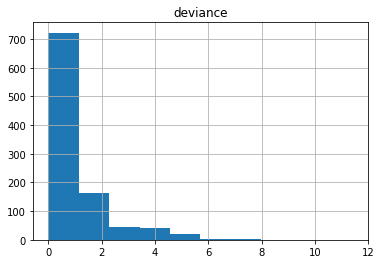

In [12]:
delta_d.hist()

In [13]:
# Find probability that difference of deviance is above 4.5
p_value = (delta_d['deviance'] >= base_delta_d).sum() / max_iter
p_value

0.028

In [14]:
# if 'delta_d <= 95% percentile', its deviance is not special
delta_d.quantile(1-significant_level)

deviance    3.899006
Name: 0.95, dtype: float64

In [15]:
print('Null hypothesis is ', end='')
if(p_value < significant_level):
    print('rejected')
else:
    print('not rejected')

Null hypothesis is rejected


## Method 2: Approximation using squared χ distribution

In [16]:
fit1 = sfm.glm(formula='y ~ 1', data=data, family=sm.families.Poisson()).fit()
fit2 = sfm.glm(formula='y ~ x', data=data, family=sm.families.Poisson()).fit()

In [17]:
chi = pd.Series(np.random.chisquare(1, max_iter))

In [18]:
# Find probability that difference of deviance is above 4.5
p_value = (chi >= base_delta_d).sum() / max_iter
p_value

0.025

In [19]:
# if 'delta_d <= 95% percentile', its deviance is not special
chi.quantile(1-significant_level)

3.5768531399430716

In [20]:
print('Null hypothesis is ', end='')
if(p_value < significant_level):
    print('rejected')
else:
    print('not rejected')

Null hypothesis is rejected
